In [1]:
pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 4.2/4.2 MB 62.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


TRAIN FOLDERS

In [2]:
import os
from skimage import io, img_as_float, img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.exposure import equalize_adapthist
import numpy as np
from PIL import Image

# Define the source and target directories for infrared preprocessing
source_dir = r'D:\GAN\final dataset\infrared train'
target_dir = r'D:\GAN\final dataset\infrared train preprocessed'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the preprocessing function for infrared images
def preprocess_infrared_image(image_path, target_path):
    # Load the image
    image = io.imread(image_path, as_gray=True)
    # Resize the image
    image_resized = Image.fromarray((image * 255).astype(np.uint8)).resize((256, 256))
    # Convert image to float
    float_image = img_as_float(image_resized)
    # Step 1: Denoising using Non-Local Means
    sigma_est = np.mean(estimate_sigma(float_image))
    patch_kw = dict(patch_size=5, patch_distance=6)
    denoised_image = denoise_nl_means(float_image, h=1.15 * sigma_est, fast_mode=True, **patch_kw)
    # Step 2: Contrast enhancement using CLAHE
    contrast_enhanced_image = equalize_adapthist(denoised_image, clip_limit=0.03)
    # Convert back to 8-bit format
    processed_image = img_as_ubyte(contrast_enhanced_image)
    # Save the processed image
    io.imsave(target_path, processed_image)

# Process all images in the source directory
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        preprocess_infrared_image(file_path, target_path)

print(f"Infrared train images have been preprocessed and saved to {target_dir}")


Infrared train images have been preprocessed and saved to D:\GAN\final dataset\infrared train preprocessed


In [3]:
import os
from PIL import Image, ImageEnhance
from pathlib import Path

# Define the source and target directories for visible preprocessing
source_dir = Path(r'D:\GAN\final dataset\visible train')
target_dir = Path(r'D:\GAN\final dataset\visible train preprocessed')

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the preprocessing function for visible images
def process_visible_image(image_path, target_path):
    with Image.open(image_path) as img:
        # Resize the image
        resized_img = img.resize((256, 256))
        # Enhance contrast
        contrast_enhancer = ImageEnhance.Contrast(resized_img)
        img_contrast_enhanced = contrast_enhancer.enhance(1.5)
        # Enhance sharpness
        sharpness_enhancer = ImageEnhance.Sharpness(img_contrast_enhanced)
        img_sharpness_enhanced = sharpness_enhancer.enhance(2)
        # Save the processed image
        img_sharpness_enhanced.save(target_path)

# Process all images in the source directory
for image_name in os.listdir(source_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        source_image_path = source_dir / image_name
        target_image_path = target_dir / image_name
        process_visible_image(source_image_path, target_image_path)

print(f"Visible train images have been preprocessed and saved to {target_dir}")

Visible train images have been preprocessed and saved to D:\GAN\final dataset\visible train preprocessed


In [4]:
import os
from PIL import Image
import random
from pathlib import Path

# Define the source and target directories for unregistered infrared images
source_dir = Path(r'D:\GAN\final dataset\infrared train preprocessed')
target_dir = Path(r'D:\GAN\final dataset\unregistered train')

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the function to apply random misalignments
def apply_misalignment(image_path, target_path):
    with Image.open(image_path) as img:
        # Choose a random misalignment
        angle = random.choice([-10, -5, 0, 5, 10])  # Rotate by ±5 or ±10 degrees
        dx = random.choice([-5, 0, 5])  # Horizontal shift
        dy = random.choice([-5, 0, 5])  # Vertical shift
        # Rotate the image
        rotated_img = img.rotate(angle, expand=True)
        # Translate the image
        width, height = rotated_img.size
        translated_img = rotated_img.transform(
            (width, height),
            Image.AFFINE,
            (1, 0, dx, 0, 1, dy),
            resample=Image.BICUBIC,
        )
        # Resize back to 256x256 to ensure consistent dimensions
        resized_img = translated_img.resize((256, 256))
        # Save the unregistered image
        resized_img.save(target_path)

# Apply misalignments to all images in the source directory
for image_name in os.listdir(source_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        source_image_path = source_dir / image_name
        target_image_path = target_dir / image_name
        apply_misalignment(source_image_path, target_image_path)

print(f"Unregistered infrared train images have been saved to {target_dir}")

Unregistered infrared train images have been saved to D:\GAN\final dataset\unregistered train


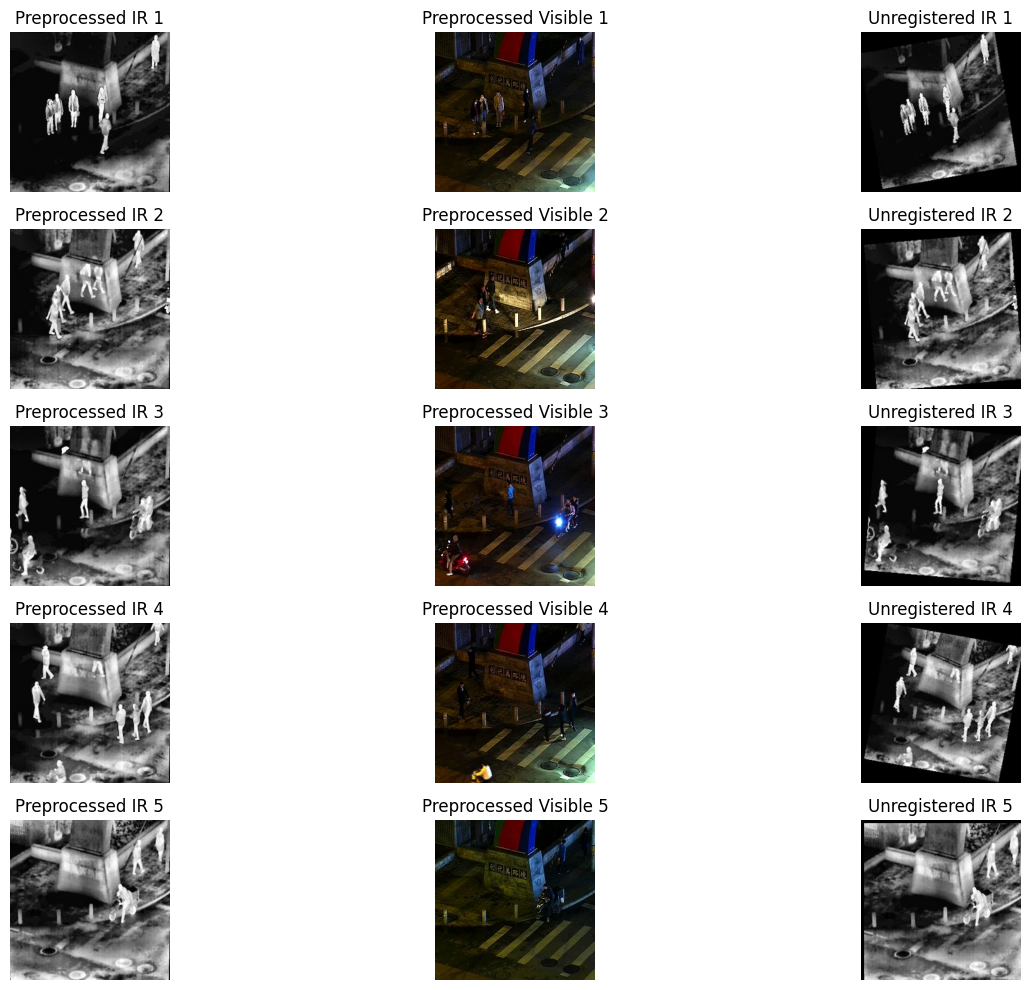

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directories for the images
preprocessed_ir_dir = r'D:\GAN\final dataset\infrared train preprocessed'
preprocessed_visi_dir = r'D:\GAN\final dataset\visible train preprocessed'
unregistered_ir_dir = r'D:\GAN\final dataset\unregistered train'

# Get the list of image names (assuming filenames are consistent across folders)
image_names = sorted(os.listdir(preprocessed_ir_dir))[:5]  # Select the first 5 images for visualization

# Plot the images
plt.figure(figsize=(15, 10))

for i, image_name in enumerate(image_names):
    # Load the images
    preprocessed_ir_image = Image.open(os.path.join(preprocessed_ir_dir, image_name))
    preprocessed_visi_image = Image.open(os.path.join(preprocessed_visi_dir, image_name))
    unregistered_ir_image = Image.open(os.path.join(unregistered_ir_dir, image_name))

    # Display Preprocessed IR Image
    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(preprocessed_ir_image, cmap='gray')
    plt.title(f'Preprocessed IR {i+1}')
    plt.axis('off')

    # Display Preprocessed Visible Image
    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(preprocessed_visi_image)
    plt.title(f'Preprocessed Visible {i+1}')
    plt.axis('off')

    # Display Unregistered IR Image
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(unregistered_ir_image, cmap='gray')
    plt.title(f'Unregistered IR {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


TEST FOLDERS 

In [6]:
import os
from skimage import io, img_as_float, img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.exposure import equalize_adapthist
import numpy as np
from PIL import Image

# Define the source and target directories for infrared preprocessing
source_dir = r'D:\GAN\final dataset\infrared test'
target_dir = r'D:\GAN\final dataset\infrared test preprocessed'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the preprocessing function for infrared images
def preprocess_infrared_image(image_path, target_path):
    # Load the image
    image = io.imread(image_path, as_gray=True)
    # Resize the image
    image_resized = Image.fromarray((image * 255).astype(np.uint8)).resize((256, 256))
    # Convert image to float
    float_image = img_as_float(image_resized)
    # Step 1: Denoising using Non-Local Means
    sigma_est = np.mean(estimate_sigma(float_image))
    patch_kw = dict(patch_size=5, patch_distance=6)
    denoised_image = denoise_nl_means(float_image, h=1.15 * sigma_est, fast_mode=True, **patch_kw)
    # Step 2: Contrast enhancement using CLAHE
    contrast_enhanced_image = equalize_adapthist(denoised_image, clip_limit=0.03)
    # Convert back to 8-bit format
    processed_image = img_as_ubyte(contrast_enhanced_image)
    # Save the processed image
    io.imsave(target_path, processed_image)

# Process all images in the source directory
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        preprocess_infrared_image(file_path, target_path)

print(f"Infrared test images have been preprocessed and saved to {target_dir}")

Infrared test images have been preprocessed and saved to D:\GAN\final dataset\infrared test preprocessed


In [7]:
import os
from PIL import Image, ImageEnhance
from pathlib import Path

# Define the source and target directories for visible preprocessing
source_dir = Path(r'D:\GAN\final dataset\visible test')
target_dir = Path(r'D:\GAN\final dataset\viisble test preprocessed')

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the preprocessing function for visible images
def process_visible_image(image_path, target_path):
    with Image.open(image_path) as img:
        # Resize the image
        resized_img = img.resize((256, 256))
        # Enhance contrast
        contrast_enhancer = ImageEnhance.Contrast(resized_img)
        img_contrast_enhanced = contrast_enhancer.enhance(1.5)
        # Enhance sharpness
        sharpness_enhancer = ImageEnhance.Sharpness(img_contrast_enhanced)
        img_sharpness_enhanced = sharpness_enhancer.enhance(2)
        # Save the processed image
        img_sharpness_enhanced.save(target_path)

# Process all images in the source directory
for image_name in os.listdir(source_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        source_image_path = source_dir / image_name
        target_image_path = target_dir / image_name
        process_visible_image(source_image_path, target_image_path)

print(f"Visible test images have been preprocessed and saved to {target_dir}")

Visible test images have been preprocessed and saved to D:\GAN\final dataset\viisble test preprocessed


In [8]:
import os
from PIL import Image
import random
from pathlib import Path

# Define the source and target directories for unregistered infrared images
source_dir = Path(r'D:\GAN\final dataset\infrared test preprocessed')
target_dir = Path(r'D:\GAN\final dataset\unregistered test')

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Define the function to apply random misalignments
def apply_misalignment(image_path, target_path):
    with Image.open(image_path) as img:
        # Choose a random misalignment
        angle = random.choice([-10, -5, 0, 5, 10])  # Rotate by ±5 or ±10 degrees
        dx = random.choice([-5, 0, 5])  # Horizontal shift
        dy = random.choice([-5, 0, 5])  # Vertical shift
        # Rotate the image
        rotated_img = img.rotate(angle, expand=True)
        # Translate the image
        width, height = rotated_img.size
        translated_img = rotated_img.transform(
            (width, height),
            Image.AFFINE,
            (1, 0, dx, 0, 1, dy),
            resample=Image.BICUBIC,
        )
        # Resize back to 256x256 to ensure consistent dimensions
        resized_img = translated_img.resize((256, 256))
        # Save the unregistered image
        resized_img.save(target_path)

# Apply misalignments to all images in the source directory
for image_name in os.listdir(source_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        source_image_path = source_dir / image_name
        target_image_path = target_dir / image_name
        apply_misalignment(source_image_path, target_image_path)

print(f"Unregistered infrared test images have been saved to {target_dir}")


Unregistered infrared test images have been saved to D:\GAN\final dataset\unregistered test


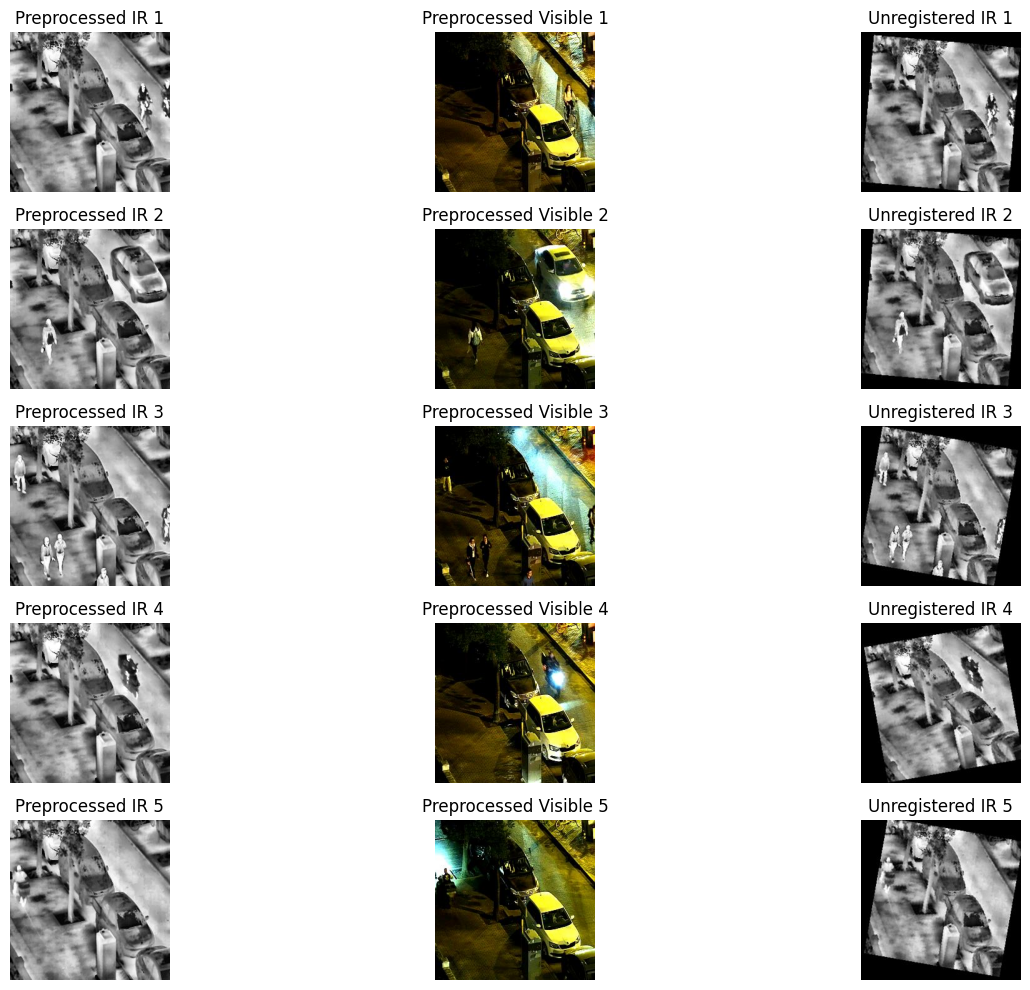

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directories for the images
preprocessed_ir_dir = r'D:\GAN\final dataset\infrared test preprocessed'
preprocessed_visi_dir = r'D:\GAN\final dataset\viisble test preprocessed'
unregistered_ir_dir = r'D:\GAN\final dataset\unregistered test'

# Get the list of image names (assuming filenames are consistent across folders)
image_names = sorted(os.listdir(preprocessed_ir_dir))[:5]  # Select the first 5 images for visualization

# Plot the images
plt.figure(figsize=(15, 10))

for i, image_name in enumerate(image_names):
    # Load the images
    preprocessed_ir_image = Image.open(os.path.join(preprocessed_ir_dir, image_name))
    preprocessed_visi_image = Image.open(os.path.join(preprocessed_visi_dir, image_name))
    unregistered_ir_image = Image.open(os.path.join(unregistered_ir_dir, image_name))

    # Display Preprocessed IR Image
    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(preprocessed_ir_image, cmap='gray')
    plt.title(f'Preprocessed IR {i+1}')
    plt.axis('off')

    # Display Preprocessed Visible Image
    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(preprocessed_visi_image)
    plt.title(f'Preprocessed Visible {i+1}')
    plt.axis('off')

    # Display Unregistered IR Image
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(unregistered_ir_image, cmap='gray')
    plt.title(f'Unregistered IR {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()